# Minimos Cuadrados

Supongamos que disponemos de un conjunto de datos $\{(x_i,y_i)\}_{i=1,\ldots,m}$. En general, los datos $y_i$ son la respuesta de un sistema a ciertas entradas dadas por las variables $x_i$. El objetivo es hallar una función $f$ tal que $y_i \approx f(x_i)$. A $f$ se le conoce como *función de regresión*.

En general, no queremos $y_i=f(x_i)$ exactamente, ya que las medidas $y_i$ pueden tener error. Lo que se busca es que la función $f$ sea sencilla, por ejemplo pertenezca a una familia paramétrica.

### Ejemplo

Supongamos que tenemos un conjunto de datos, a los cuales queremos ajustar una recta. En este caso, la función $f$ es de la forma:

$$f(x;\theta) = \theta_1 x +\theta_2.$$

Aquí $\theta$ es el conjunto de parámetros que queremos ajustar, en este caso la pendiente y ordenada en el origen de la recta.

## Criterio de mínimos cuadrados

Para un conjunto de datos dado, existen muchas posibles $f$ que aproximan. El criterio de mínimos cuadrados establece una forma de elegir la función de regresión que mejor ajusta.

El criterio es el siguiente:

> **Criterio de mínimos cuadrados:** Dado un conjunto de datos $\{(x_i,y_i)\}_{i=1,\ldots,m}$ y una función de regresión $f(x;\theta)$ dependiente de uno o más parámetros, elegimos $\theta$ de manera que se alcance:
>
> $$\min_{\theta} \sum_{i=1}^m (y_i - f(x_i;\theta))^2.$$

El vector de parámetros $\hat{\theta}$ que alcanza el mínimo nos da la función de regresión óptima.

### Ejemplo

Volviendo al caso de la recta, dado el conjunto de datos, se desea minimizar:

$$R(\theta_1,\theta_2) = \sum_{i=1}^m (y_i - \theta_1 x_i - \theta_2)^2.$$

Esta es una función de dos variables en $\theta_1,\theta_2$, por lo que para minimizar deberíamos hallar un punto estacionario, por ejemplo derivando respecto a cada parámetro e igualando a $0$. Sin embargo veremos ahora una forma más sencilla de llegar a la solución.

## Mínimos cuadrados lineales

Supongamos que la función de regresión puede escribirse de la siguiente forma:

$$f(x;\theta) = \theta_1 \phi_1(x) + \ldots + \theta_n \phi_n(x)$$

donde $\theta_i$ son los parámetros y $\phi_i(x)$ es una *base de funciones*. Estas funciones son genéricas y se eligen para lograr el ajuste deseado al problema. 

Llamamos *mínimos cuadrados lineales* a este caso, es decir, cuando la función de regresión es una *función lineal de los parámetros $\theta$*.

In [95]:
using LinearAlgebra

function ajuste(x,y,n)
    A=x.^n;
    
    while n>0
    n= n-1;    
    A= [A x.^n]
    end
    
    A0= A'*A #Traspuesta por A
    B0= A'*y
    tita= A0\B0 #Division al revez para dividir entre matrices 
    residuo = norm(y-A*tita)
    
return tita,residuo;
    
    
end;


> **Ejemplo 1: ajuste a una recta**
>
> Si tomamos $\phi_1(x) = x$, $\phi_2(x) = 1$ tenemos el ajuste anterior.


> **Ejemplo 2: ajuste a un polinomio**
>
> Si tomamos $\phi_i(x) = x^i$ para $i=0,\ldots,n$ entonces la función de regresión $f$ es un polinomio de grado $n$ y sus parámetros son los coeficientes.
 
> **Ejemplo 3: ajuste a una sinusoide**
>
> Si tomamos $\phi_1(x) = \cos(\omega x)$ y $\phi_2(x) = \sin(\omega x)$, entonces la función de regresión es una sinusoide de frecuencia $\omega$ dada y sus parámetros permiten ajustar amplitud y fase.

## Formulación geométrica

Dado un conjunto de datos $\{(x_i,y_i)\}$, y $f$ lineal en $\theta$ el criterio de mínimos cuadrados busca minimizar el *residuo*:

$$ R(\theta) = \sum_{i=1}^m (y_i - f(x_i,\theta))^2.$$

Para un $x$ dado, sea $\phi(x)$ el vector:

$$\phi(x) = \left(\begin{array}{c}\phi_1(x) \\ \vdots \\ \phi_n(x)\end{array}\right).$$

Entonces la función de regresión se puede escribir como:

$$ f(x;\theta) = \phi(x)^T \theta, $$

siendo $\theta$ el vector columna $[\theta_1,\ldots,\theta_n]$. El residuo es entonces:

$$ R(\theta) = \sum_{i=1}^m (y_i - \phi(x_i)^T \theta)^2.$$


Sea ahora el vector $y=[y_1,\ldots,y_m]$ columna y consideremos la matriz $A$ de $m$ filas y $n$ columnas:

$$A = \left(\begin{array}{c} \phi(x_1)^T \\ \vdots \\ \phi(x_m)^T \end{array}\right) = \left(\begin{array}{ccc}
\phi_1(x_1) & \cdots & \phi_n(x_1) \\
\vdots & \ddots & \vdots \\
\phi_1(x_m) & \cdots & \phi_n(x_m) \end{array}\right).$$

Se tiene la identidad:
$$\left(\begin{array}{c} y_1 - \phi(x_1)^T\theta \\ \vdots \\ y_m- \phi(x_m)^T \theta \end{array}\right) = y - A\theta.$$

Y por lo tanto:
$$ R(\theta) = \|y-A\theta\|^2.$$

Es decir, con la construcción anterior, la función a minimizar es la distancia en norma 2 del vector $A\theta$ con el vector $y$ de datos. La matriz $A$ está determinada por los $x_i$ y las funciones de base elegidas.

## Ecuaciones normales

En general, en la formulación anterior, $m\gg n$ (hay más datos que parámetros) por lo que el sistema $A\theta = y$ es incompatible. Es decir, el residuo anterior no puede anularse.

Para hallar el mínimo, conviene realizar la siguiente observación: al variar $\theta$, el vector $A\theta$ recorre el subespacio $Im(A)$ (generado por las columnas de $A$). 

![proyeccion](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Linear_least_squares_geometric_interpretation.png/330px-Linear_least_squares_geometric_interpretation.png)

Se desea hallar el vector que minimice la distancia entre $y$ y la imagen de $A$. Este vector será la *proyección ortogonal* de $y$ sobre el subespacio.

Para que la proyección sea ortogonal, el vector $y-A\theta$ buscado debe ser perpendicular a todas las columnas de $A$, es decir, se debe cumplir:

$$A^T (y-A\theta) = 0,$$

ya que multiplicar a izquierda por $A^T$ es como hacer el producto interno con cada columna.

De lo anterior se tiene que el $\hat{\theta}$ óptimo verifica:

$$A^T A \hat{\theta} = A^T y.$$

Al sistema de ecuaciones anterior se le denomina **ecuaciones normales**.

### Ejemplo

Si queremos ajustar a una recta, entonces $\phi(x) = \theta_1 x + \theta_2$, el vector incógnita es $\theta= [\theta_1,\theta_2]$ y la matriz $A$ queda:

$$A = \left(\begin{array}{cc} x_1 & 1 \\ x_2 & 1 \\ \vdots & \vdots \\ x_m & 1\end{array}\right) .$$


Se tiene que:

$$ A^T A = \left(\begin{array}{cc} \sum_i x_i^2 & \sum_i x_i \\ \sum_i x_i & m \end{array} \right), \quad A^T y = \left(\begin{array}{c} \sum_i x_iy_i \\ \sum_i y_i \end{array} \right).$$

In [96]:
# Ejemplo mínimos cuadrados. Se genera un conjunto de datos con una recta 
# conocida perturbada por ruido. Luego se ajusta y se compara con los parámetros originales.

using Distributions,PyPlot

x=(0:.2:10);
theta_real = [2;1];
yreal=theta_real[1]*x .+theta_real[2];

#perturbo el y y graficamos
y=yreal+10*rand(Normal(),size(yreal))

plot(x,y,"*");
plot(x,yreal,":");

ArgumentError: ArgumentError: Package Distributions not found in current path:
- Run `import Pkg; Pkg.add("Distributions")` to install the Distributions package.


In [97]:
#Resuelvo ecuaciones normales
using LinearAlgebra

A=[x ones(size(x))];
theta = (A'*A)\(A'*y); #El operador \ permite resolver sistemas lineales.
R= norm(y-A*theta);

plot(x,y,"*")
plot(x,A*theta,":r")
plot(x,yreal,":g")

println("Parámetros hallados: $theta");
println("Residuo: $R ")

UndefVarError: UndefVarError: yreal not defined

## Ejercicio

1. Construya una funcion `ajuste(x,y,n)` que realice el ajuste de un polinomio de grado $n$ a los datos $x,y$ genéricos. La función debe retornar el valor de los coeficientes $\theta$ y el residuo $R$ alcanzado.

2. Considere el siguiente conjunto de datos, que corresponde a la población resultante del censo de EEUU realizado cada $10$ años. Ajuste un polinomio de grado $n$, con $n=1,2,\ldots$. Observe el comportamiento del residuo y decida hasta que valor de $n$ es razonable hacer crecer el grado del polinomio.

In [98]:
using LinearAlgebra

x=[1;2;3;4;5];
y=[2;4;6;8;10];
n=0;
tita,residuo = ajuste(x,y,n);

println("Parámetros hallados: $tita")
println("Residuo: $residuo ")


Parámetros hallados: 6.0
Residuo: 6.324555320336759 


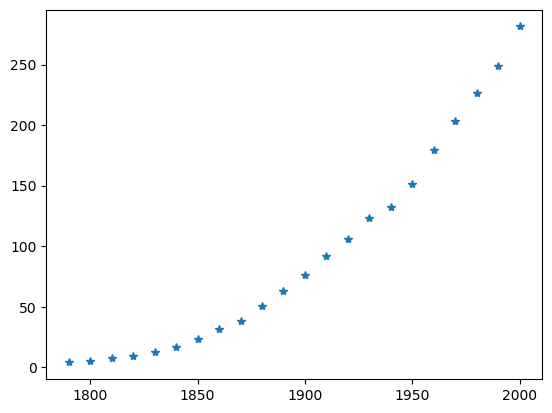

In [99]:
using PyPlot

#Año del censo
x=[1790, 1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000]
y=[3.929214, 5.308483, 7.239881,  9.638453, 12.860702, 17.063353, 23.191876, 31.443321, 38.558371, 50.189209, 62.979766,  76.212168, 92.228496, 106.021537, 123.202624, 132.164569, 151.325798, 179.323175, 203.302031, 226.542199, 248.709873, 281.421906]
n=1;
tita,residuo = ajuste(x,y,n);

plot(x,y,"*");
#Tirar A desde ajuste tmb 

